# Data Collection, Understanding and Preparation

## Air Quality Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import datetime
from pprint import pprint
import plotly.express as px
from scipy.stats import linregress

In [2]:
# Build a DataFrame for air quality data (the data is downloaded manually from WAQI website)
parent_folder = 'data/air_quality'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
air_quality_df = pd.concat(df_list, ignore_index=True)

### Data Understanding

In [4]:
# Visualize the DataFrame and have an initial understanding of the dataset structure
air_quality_df.sort_values(by='Date')

,Date,Country,City,Specie,count,min,max,median,variance
2362162,1/01/2015,CA,Victoria,o3,46,0.3,12.3,3.4,122.69
2274955,1/01/2015,JP,Hiroshima,pm25,179,5.0,57.0,25.0,1316.31
2439463,1/01/2015,RU,Moscow,so2,115,0.6,7.1,2.1,24.17
2275237,1/01/2015,JP,Shizuoka,co,32,1.2,12.3,3.4,38.60
2143303,1/01/2015,DE,Stuttgart,no2,18,9.2,20.2,15.1,157.70
...,...,...,...,...,...,...,...,...,...
2699735,9/12/2019,MX,Ecatepec de Morelos,wind-speed,21,1.0,6.6,2.5,35.55
2920365,9/12/2019,BR,São José dos Campos,humidity,96,42.0,95.0,77.0,1308.36
2756795,9/12/2019,CN,Nanjing,pressure,240,1020.0,1026.0,1022.0,29.80
2699581,9/12/2019,MX,Ecatepec de Morelos,pm25,22,50.0,155.0,78.0,9118.46


In [14]:
# Attributes types
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006702 entries, 0 to 5006701
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date      object 
 1   Country   object 
 2   City      object 
 3   Specie    object 
 4   count     int64  
 5   min       float64
 6   max       float64
 7   median    float64
 8   variance  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 343.8+ MB


In [6]:
# Total countries and cities covered by the dataset
total_countries = air_quality_df["Country"].nunique()
print(f'Total countries covered by the dataset : {total_countries}')

total_cities = air_quality_df["City"].nunique()
print(f'Total cities covered by the dataset : {total_cities}')

Total countries covered by the dataset : 95
Total cities covered by the dataset : 615


In [4]:
# Find the earliest date the air quality dataset covers
covered_dates = pd.to_datetime(air_quality_df['Date'], format='%d/%m/%Y')
covered_dates.min()

Timestamp('2014-12-29 00:00:00')

In [21]:
# Find the latest date the air quality dataset covers
covered_dates.max()

Timestamp('2021-06-24 00:00:00')

The dataset has 5 006 702 observations in 95 country and 615 city from December 12, 2014 to June 24,2021. Each observation is described with the date of the observation, the country code, the city, the specie (air quality indexes) and the characteristics of these species (their count, min, max, median and variance).

In [5]:
# An overview of the species covered by the dataset and the number of rows each Specie has in the DataFrame
air_quality_df["Specie"].value_counts()

no2              565392
pm25             552899
pm10             547363
o3               541019
so2              469871
co               429370
temperature      338991
humidity         338874
pressure         336973
wind-speed       327923
dew              230768
wind-gust        214730
wd                30465
precipitation     30222
aqi               19417
uvi               14001
wind speed         4517
pol                4243
wind gust          2875
d                  2031
pm1                1560
neph               1537
mepaqi             1298
psi                 363
Name: Specie, dtype: int64

In [6]:
# Data characteristics
air_quality_df.describe()

,count,min,max,median,variance
count,5.006702e+06,5.006702e+06,5.006702e+06,5.006702e+06,5.006702e+06
mean,1.284734e+02,7.366938e+01,1.102263e+02,8.744976e+01,7.005870e+03
std,1.837467e+02,2.470160e+02,2.515610e+02,2.456600e+02,1.882350e+05
min,2.000000e+00,-3.276600e+03,-3.065600e+03,-3.065600e+03,0.000000e+00
25%,4.400000e+01,1.000000e+00,1.100000e+01,4.200000e+00,2.659000e+01
50%,7.200000e+01,3.700000e+00,3.000000e+01,1.350000e+01,1.854400e+02
75%,1.510000e+02,1.700000e+01,7.400000e+01,3.600000e+01,1.021280e+03
max,2.779000e+03,1.520000e+03,3.276000e+03,2.120500e+03,6.812430e+07


In [7]:
# Exploring the most covered countries and cities
most_covered_countries = air_quality_df["Country"].value_counts()
print(f'Most Covered Countries in the Dataset :\n{most_covered_countries.head(10)}')

most_covered_cities = air_quality_df["City"].value_counts()
print(f'\n\nMost Covered Cities in the Dataset :\n{most_covered_cities.head(20)}')

Most Covered Countries in the Dataset :
CN    566288
US    495965
JP    350561
FR    234331
KR    228774
ES    205435
GB    183619
IN    169516
TR    158672
PL    142854
Name: Country, dtype: int64


Most Covered Cities in the Dataset :
London          18390
Douliu          12694
Taichung        12669
Taipei          12655
Hsinchu         12655
Keelung         12627
Kaohsiung       12627
Tainan          12485
Shijiazhuang    12475
Taitung City    12262
Chiang Mai      12195
Hong Kong       12180
Qinhuangdao     12179
Brisbane        12123
Sydney          11981
Anyang          11889
Bogotá          11875
Delhi           11804
Darwin          11776
Seoul           11762
Name: City, dtype: int64


### Data Cleansing

In [9]:
# Remove useless species to our analysis (the ones that are not considered air pollutants like temperature, pressure, ...)
species_to_remove = ["temperature", "humidity", "pressure", "wind-speed", "dew", "wind-gust",
                     "wind speed", "wind gust", "precipitation", "wd", "aqi", "uvi", "pol", "pm1", "mepaqi", "neph"]

air_pollution_df = air_quality_df[~air_quality_df["Specie"].isin(species_to_remove)].reset_index(drop=True).copy()

# Overview of the remaining air pollutant species in focus
air_pollution_df["Specie"].value_counts()

no2     565392
pm25    552899
pm10    547363
o3      541019
so2     469871
co      429370
d         2031
psi        363
Name: Specie, dtype: int64

In [10]:
# Change the type of Date  from Object to Date type
air_pollution_df['Date'] = pd.to_datetime(air_pollution_df['Date'], format='%d/%m/%Y')

In [11]:
# Double check the Date data type
air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108308 entries, 0 to 3108307
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 213.4+ MB


In [12]:
# Because we only focus on air data from 2019 to 2020H1,
# we'll remove the few data points on 2018-12-31 and the first days of July 2020.
clean_air_pollution_df = air_pollution_df[(air_pollution_df["Date"] >= pd.to_datetime("2019-01-01")) & (air_pollution_df["Date"] <= pd.to_datetime("2020-07-01"))].copy()
clean_air_pollution_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
422175,2019-07-02,SK,Košice,so2,88,10.2,12.2,11.2,2.90
422176,2019-07-07,SK,Košice,so2,88,10.7,17.3,12.2,39.87
422177,2019-07-14,SK,Košice,so2,76,10.2,12.2,11.7,2.37
422178,2019-08-11,SK,Košice,so2,68,11.2,12.2,11.7,1.04
422179,2019-09-06,SK,Košice,so2,88,10.7,12.7,12.2,2.28


In [13]:
# Check the starting and ending date for the air pollution dataframe
starting_date = clean_air_pollution_df["Date"].min()
ending_date = clean_air_pollution_df["Date"].max()

In [27]:
starting_date

Timestamp('2019-01-01 00:00:00')

In [29]:
ending_date

Timestamp('2020-01-05 00:00:00')

In [14]:
# Number of countries that are still covered in the dataframe
clean_air_pollution_df["Country"].nunique()

91

In [35]:
# Number of cities that are still covered in the dataframe
clean_air_pollution_df["City"].nunique()

597

In [36]:
# Visualization of the resulting DataFrame
clean_air_pollution_df.sort_values(by='Date')

,Date,Country,City,Specie,count,min,max,median,variance
1808720,2019-01-01,BE,Gent,pm25,143,23.0,76.0,50.0,1643.82
1978884,2019-01-01,CN,Qingdao,no2,194,8.3,55.2,22.0,633.36
1900623,2019-01-01,JP,Nagoya,pm25,781,5.0,104.0,42.0,4590.55
1865488,2019-01-01,US,Tucson,so2,15,0.2,0.2,0.2,0.00
1837303,2019-01-01,IN,Kolkata,pm10,96,94.0,562.0,159.0,87780.10
...,...,...,...,...,...,...,...,...,...
1596232,2020-01-05,AU,Wollongong,so2,17,1.5,10.0,4.3,73.30
1625931,2020-01-05,RO,Braşov,pm10,96,4.0,53.0,19.0,1666.04
1673429,2020-01-05,CN,Hohhot,pm10,146,27.0,283.0,75.0,16716.20
1792999,2020-01-05,TR,Samsun,pm25,120,98.0,125.0,120.0,693.00


In [16]:
# Transpose the clean_air_df so that the species will become the columns.
clean_air_pollution_df_transposed = clean_air_pollution_df.pivot_table(
    index=["Date", "Country", "City"], columns="Specie", values="median").copy()
clean_air_pollution_df_transposed.reset_index(inplace=True)
clean_air_pollution_df_transposed

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1
...,...,...,...,...,...,...,...,...,...
203438,2020-01-05,ZA,Port Elizabeth,3.6,4.2,NaN,13.0,21.0,0.6
203439,2020-01-05,ZA,Pretoria,1.1,3.2,0.5,14.0,38.0,2.1
203440,2020-01-05,ZA,Richards Bay,NaN,1.0,16.3,11.0,13.0,1.5
203441,2020-01-05,ZA,Vereeniging,6.5,1.9,15.5,17.0,38.0,1.1


In [17]:
clean_air_pollution_df_transposed.describe()

Specie,co,no2,o3,pm10,pm25,so2
count,133017.000000,173690.000000,164918.000000,170383.000000,175674.000000,148232.000000
mean,5.059144,10.542359,20.768279,27.602452,56.146681,4.039821
std,14.278288,8.891049,23.275223,26.001084,43.001615,11.542574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000,5.000000,11.200000,12.000000,26.000000,1.100000
50%,3.400000,8.400000,19.200000,20.000000,46.000000,2.600000
75%,6.000000,13.700000,27.200000,35.000000,71.000000,4.300000
max,500.000000,500.000000,500.000000,999.000000,999.000000,500.000000


In [18]:
# Create a new column that captures month of each year
clean_air_pollution_df_transposed['year_month'] = clean_air_pollution_df_transposed["Date"].dt.to_period("M")
clean_air_pollution_df_transposed.head()

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2,year_month
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN,2019-01
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6,2019-01
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1,2019-01
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7,2019-01
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1,2019-01


In [19]:
# Define a function to draw boxplots showing monthly distribution of median values
# of different air pollutants across 2019 and 2020H1 (January - July)
def specie_boxplot(specie):
    fig, ax = plt.subplots(figsize=(16, 20))

    green_square = dict(markerfacecolor='g', marker='s', alpha=0.2)
    sns.boxplot(data=clean_air_df_transposed, x='year_month', y=specie, flierprops=green_square)

    plt.xlabel("Year_Month", fontsize=16)
    plt.ylabel(specie, fontsize=16)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.title(
        f"Monthly Distribution of Median {specie} in 94 countries in 2019-2020H1", fontsize=20)
    plt.savefig(f"images/boxplot_{specie}.png")

In [20]:
# Since the dataset has only the code of the country we will try to add the country name for a better readability
# We will use the following api to get the country name, country code and slug 
# WE WILL ONLY GET COUNTRIES NAMES THAT WOULD BE PRESENT IN THE COVID-19 DATASET
country_url = "https://api.covid19api.com/countries"
country_covid_data = requests.get(country_url).json()

In [21]:
# Create the country  dataframe
country_covid_df = pd.DataFrame(country_covid_data)
country_covid_df

,Country,Slug,ISO2
0,Canada,canada,CA
1,Maldives,maldives,MV
2,Sierra Leone,sierra-leone,SL
3,Congo (Brazzaville),congo-brazzaville,CG
4,Pakistan,pakistan,PK
...,...,...,...
243,Mauritius,mauritius,MU
244,Oman,oman,OM
245,Portugal,portugal,PT
246,Belize,belize,BZ


In [22]:
# The country code is used to merge with the air quality data (with country code only)
final_air_pollution_df = pd.merge(clean_air_pollution_df, country_covid_df, how="inner",
                        left_on="Country", right_on="ISO2", suffixes=("_code", "_name"))
final_air_pollution_df.head(10)

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug,ISO2
0,2019-07-02,SK,Košice,so2,88,10.2,12.2,11.2,2.90,Slovakia,slovakia,SK
1,2019-07-07,SK,Košice,so2,88,10.7,17.3,12.2,39.87,Slovakia,slovakia,SK
2,2019-07-14,SK,Košice,so2,76,10.2,12.2,11.7,2.37,Slovakia,slovakia,SK
3,2019-08-11,SK,Košice,so2,68,11.2,12.2,11.7,1.04,Slovakia,slovakia,SK
4,2019-09-06,SK,Košice,so2,88,10.7,12.7,12.2,2.28,Slovakia,slovakia,SK
5,2019-07-26,SK,Košice,so2,84,11.2,16.8,12.2,24.50,Slovakia,slovakia,SK
6,2019-07-27,SK,Košice,so2,88,11.2,12.7,11.7,1.78,Slovakia,slovakia,SK
7,2019-08-08,SK,Košice,so2,92,8.7,12.7,11.7,6.48,Slovakia,slovakia,SK
8,2019-09-03,SK,Košice,so2,68,8.7,12.7,12.2,8.92,Slovakia,slovakia,SK
9,2019-09-05,SK,Košice,so2,88,11.2,19.3,12.7,44.42,Slovakia,slovakia,SK


In [23]:
# Delete the ISO2 which is identical to the country_code column
del final_air_pollution_df["ISO2"]
final_air_pollution_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-07-02,SK,Košice,so2,88,10.2,12.2,11.2,2.90,Slovakia,slovakia
1,2019-07-07,SK,Košice,so2,88,10.7,17.3,12.2,39.87,Slovakia,slovakia
2,2019-07-14,SK,Košice,so2,76,10.2,12.2,11.7,2.37,Slovakia,slovakia
3,2019-08-11,SK,Košice,so2,68,11.2,12.2,11.7,1.04,Slovakia,slovakia
4,2019-09-06,SK,Košice,so2,88,10.7,12.7,12.2,2.28,Slovakia,slovakia


In [48]:
final_air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984247 entries, 0 to 984246
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          984247 non-null  datetime64[ns]
 1   Country_code  984247 non-null  object        
 2   City          984247 non-null  object        
 3   Specie        984247 non-null  object        
 4   count         984247 non-null  int64         
 5   min           984247 non-null  float64       
 6   max           984247 non-null  float64       
 7   median        984247 non-null  float64       
 8   variance      984247 non-null  float64       
 9   Country_name  984247 non-null  object        
 10  Slug          984247 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 90.1+ MB


In [24]:
# Number of countries left after the merge 
covered_list = final_air_pollution_df["Slug"].unique().tolist()
print(len(covered_list))

# Number of countries covered by air pollution dataset but not by covid-19 dataset
uncovered_countries = air_pollution_df["Country"].nunique() - len(covered_list)
uncovered_countries

90


4

## Covid-19 Dataset

### Data Collection

In [25]:
# Use the slug list to loop through the Covid-19 API by all case status for each country.
base_covid_url = "https://api.covid19api.com/total/country/"

country_list = list()
date_list = list()
active_list = list()
confirmed_list = list()
recovered_list = list()
deaths_list = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for slug in covered_list:

    try:
        response = requests.get(base_covid_url + slug).json()

        for element in response:
            country_list.append(element['Country'])
            date_list.append(element['Date'])
            active_list.append(element['Active'])
            confirmed_list.append(element['Confirmed'])
            recovered_list.append(element['Recovered'])
            deaths_list.append(element['Deaths'])

        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {slug}")

        if counter == 50:
            set_counter += 1
            counter = 0

    except KeyError:
        print("Country not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | slovakia
Processing Record 2 of Set 1 | bolivia
Processing Record 3 of Set 1 | hong-kong-sar-china
Processing Record 4 of Set 1 | iceland
Processing Record 5 of Set 1 | kyrgyzstan
Processing Record 6 of Set 1 | united-arab-emirates
Processing Record 7 of Set 1 | colombia
Processing Record 8 of Set 1 | ukraine
Processing Record 9 of Set 1 | kosovo
Processing Record 10 of Set 1 | germany
Processing Record 11 of Set 1 | macedonia
Processing Record 12 of Set 1 | myanmar
Processing Record 13 of Set 1 | mexico
Processing Record 14 of Set 1 | réunion
Processing Record 15 of Set 1 | denmark
Processing Record 16 of Set 1 | estonia
Processing Record 17 of Set 1 | iran
Processing Record 18 of Set 1 | vietnam
Processing Record 19 of Set 1 | united-kingdom
Processing Record 20 of Set 1 | mongolia
Processing Record 21 of Set 1 | puerto-rico
Processing Record 22 of Set 1 | italy
Processing Record 23 of Set 1 |

In [26]:
# Create the world covid dataframe
covid_df = pd.DataFrame({
    "Country": country_list,
    "Date": date_list,
    "Active cases": active_list,
    "Confirmed cases": confirmed_list,
    "Recovered cases": recovered_list,
    "Deaths": deaths_list
})
covid_df.sort_values(by='Date', ascending=False).head(20)

,Country,Date,Active cases,Confirmed cases,Recovered cases,Deaths
73694,Costa Rica,2022-06-06T00:00:00Z,896409,904934,0,8525
70226,Greece,2022-06-06T00:00:00Z,3443214,3473141,0,29927
71093,Mali,2022-06-06T00:00:00Z,30376,31111,0,735
58088,Argentina,2022-06-06T00:00:00Z,9147645,9276618,0,128973
15605,Mongolia,2022-06-06T00:00:00Z,923048,925227,0,2179
39881,Uzbekistan,2022-06-06T00:00:00Z,237498,239135,0,1637
33812,Lao PDR,2022-06-06T00:00:00Z,209327,210083,0,756
21674,United States of America,2022-06-06T00:00:00Z,83873430,84882287,0,1008857
52019,Bahrain,2022-06-06T00:00:00Z,588321,589809,0,1488
3467,Kyrgyzstan,2022-06-06T00:00:00Z,198002,200993,0,2991


### Data Understanding

In [28]:
# The earliest date the covid 19 dataset covers
covid_df['Date'].min()

'2020-01-22T00:00:00Z'

In [57]:
# The latest date the covid 19 dataset covers
covid_df['Date'].max()

'2022-06-06T00:00:00Z'

In [58]:
# Countries covered by COVID-19 dataset
print('The covid 19 dataset covers '+str(covid_df['Country'].nunique())+' countries : \n\n'+',  '.join(list(covid_df['Country'].unique())))

The covid 19 dataset covers 85 countries : 

Slovakia,  Bolivia,  Iceland,  Kyrgyzstan,  United Arab Emirates,  Colombia,  Ukraine,  Republic of Kosovo,  Germany,  Macedonia, Republic of,  Myanmar,  Mexico,  Denmark,  Estonia,  Iran, Islamic Republic of,  Viet Nam,  United Kingdom,  Mongolia,  Italy,  Singapore,  Czech Republic,  Algeria,  Saudi Arabia,  Thailand,  United States of America,  Brazil,  Canada,  Ireland,  Bulgaria,  Pakistan,  Romania,  Serbia,  Uganda,  Spain,  Ethiopia,  Israel,  Korea (South),  Kuwait,  Lao PDR,  Tajikistan,  Bosnia and Herzegovina,  Ecuador,  South Africa,  Philippines,  El Salvador,  Uzbekistan,  Cyprus,  Japan,  Peru,  Poland,  Russian Federation,  Finland,  Croatia,  Sri Lanka,  India,  Iraq,  Jordan,  Kazakhstan,  Austria,  Bahrain,  China,  New Zealand,  Portugal,  Chile,  France,  Netherlands,  Argentina,  Australia,  Switzerland,  Nepal,  Sweden,  Turkey,  Belgium,  Lithuania,  Indonesia,  Norway,  Taiwan, Republic of China,  Bangladesh,  Hunga

In [20]:
# Overview of the covid dataframe
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73270 entries, 0 to 73269
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          73270 non-null  object
 1   Date             73270 non-null  object
 2   Active cases     73270 non-null  int64 
 3   Confirmed cases  73270 non-null  int64 
 4   Recovered cases  73270 non-null  int64 
 5   Deaths           73270 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ MB


In [91]:
covid_df.describe()

,Active cases,Confirmed cases,Recovered cases,Deaths
count,7.327000e+04,7.327000e+04,7.327000e+04,7.327000e+04
mean,1.506260e+06,1.838554e+06,2.970980e+05,3.310514e+04
std,5.661427e+06,5.881182e+06,1.431308e+06,9.193763e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.633250e+03,2.288175e+04,0.000000e+00,3.750000e+02
50%,4.698300e+04,2.418800e+05,9.585000e+02,4.521500e+03
75%,6.609845e+05,1.138017e+06,9.331175e+04,2.048800e+04
max,8.344223e+07,8.444499e+07,3.097475e+07,1.007685e+06


### Data Cleansing

In [29]:
# Convert the Date column to datetime format
covid_df['Date'] = covid_df['Date'].astype('datetime64[ns]')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73695 entries, 0 to 73694
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          73695 non-null  object        
 1   Date             73695 non-null  datetime64[ns]
 2   Active cases     73695 non-null  int64         
 3   Confirmed cases  73695 non-null  int64         
 4   Recovered cases  73695 non-null  int64         
 5   Deaths           73695 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ MB


In [30]:
# Set cutoff date to the 1st July 2020
world_covid_df = covid_df[covid_df["Date"] <= '2020-07-01']

In [61]:
# Check the number of unique countries in the world_covid_df
covid_df["Country"].nunique()

85

In [31]:
# Export the list of countries that are shared by the air data and world covid data
air_covid_common_country_list = covid_df["Country"].unique().tolist()
air_covid_common_country_list

['Slovakia',
 'Bolivia',
 'Iceland',
 'Kyrgyzstan',
 'United Arab Emirates',
 'Colombia',
 'Ukraine',
 'Republic of Kosovo',
 'Germany',
 'Macedonia, Republic of',
 'Myanmar',
 'Mexico',
 'Denmark',
 'Estonia',
 'Iran, Islamic Republic of',
 'Viet Nam',
 'United Kingdom',
 'Mongolia',
 'Italy',
 'Singapore',
 'Czech Republic',
 'Algeria',
 'Saudi Arabia',
 'Thailand',
 'United States of America',
 'Brazil',
 'Canada',
 'Ireland',
 'Bulgaria',
 'Pakistan',
 'Romania',
 'Serbia',
 'Uganda',
 'Spain',
 'Ethiopia',
 'Israel',
 'Korea (South)',
 'Kuwait',
 'Lao PDR',
 'Tajikistan',
 'Bosnia and Herzegovina',
 'Ecuador',
 'South Africa',
 'Philippines',
 'El Salvador',
 'Uzbekistan',
 'Cyprus',
 'Japan',
 'Peru',
 'Poland',
 'Russian Federation',
 'Finland',
 'Croatia',
 'Sri Lanka',
 'India',
 'Iraq',
 'Jordan',
 'Kazakhstan',
 'Austria',
 'Bahrain',
 'China',
 'New Zealand',
 'Portugal',
 'Chile',
 'France',
 'Netherlands',
 'Argentina',
 'Australia',
 'Switzerland',
 'Nepal',
 'Sweden',
 

In [32]:
# Filter out the air quality data to contain only the above countries
final_clean_air_pollution_df = final_air_pollution_df[final_air_pollution_df["Country_name"].isin(
    air_covid_common_country_list)]
final_clean_air_pollution_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-07-02,SK,Košice,so2,88,10.2,12.2,11.2,2.90,Slovakia,slovakia
1,2019-07-07,SK,Košice,so2,88,10.7,17.3,12.2,39.87,Slovakia,slovakia
2,2019-07-14,SK,Košice,so2,76,10.2,12.2,11.7,2.37,Slovakia,slovakia
3,2019-08-11,SK,Košice,so2,68,11.2,12.2,11.7,1.04,Slovakia,slovakia
4,2019-09-06,SK,Košice,so2,88,10.7,12.7,12.2,2.28,Slovakia,slovakia


In [65]:
# Double check the number of countries in the final clean air data
final_clean_air_pollution_df["Country_name"].nunique()

85

In [33]:
# Delete Slug column since we're done downloading covid data using it and 
# it provides the same information as country name
del final_clean_air_pollution_df["Slug"]
final_clean_air_pollution_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2019-07-02,SK,Košice,so2,88,10.2,12.2,11.2,2.90,Slovakia
1,2019-07-07,SK,Košice,so2,88,10.7,17.3,12.2,39.87,Slovakia
2,2019-07-14,SK,Košice,so2,76,10.2,12.2,11.7,2.37,Slovakia
3,2019-08-11,SK,Košice,so2,68,11.2,12.2,11.7,1.04,Slovakia
4,2019-09-06,SK,Košice,so2,88,10.7,12.7,12.2,2.28,Slovakia


In [34]:
# Export the air data to csv file for future use
final_clean_air_pollution_df.to_csv("output/clean_world_air.csv", index=False)

# Data Analysis

## Air Pollution Effect on COVID-19

**Since covid 19 is a respiratory disease can air pollution be a factor of its fast spread and high mortality rate ?**

In [35]:
# Impact of COVID-19 on the world in terms of infections and deaths 
world_numbers = []
total_deaths = [] 
total_recovered = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = covid_df['Confirmed cases'].sum()
recovered_sum = covid_df['Recovered cases'].sum()
death_sum = covid_df.Deaths.sum()
world_numbers.append(confirmed_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [36]:
#Print Output
print ('Total Confirmed Cases = '+ str(confirmed_sum))
print ('Total Recovered Cases = '+ str(recovered_sum))
print ('Total Deaths Cases = '+ str(death_sum))
print ('Total Recovery Rate(%) = '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%) = '+ str(mean_mortality_rate*100))

Total Confirmed Cases = 137232389819
Total Recovered Cases = 21768371819
Total Deaths Cases = 2455694194
Total Recovery Rate(%) = 15.862415460162845
Total Fatality Rate(%) = 1.7894421260453819


In [37]:
# Filter out the world covid data with active cases
world_active_covid = covid_df[[
    "Date", "Country", "Active cases"]].sort_values("Date").copy()
world_active_covid.head()

,Date,Country,Active cases
0,2020-01-22,Slovakia,0
10404,2020-01-22,Denmark,0
32079,2020-01-22,Kuwait,0
41616,2020-01-22,Peru,0
72828,2020-01-22,Costa Rica,0


In [38]:
end_date = world_active_covid['Date'].max()
end_date

Timestamp('2022-06-06 00:00:00')

**WHO declared COVID-19 outbreak a Public Health Emergency of International Concern on 30th January 2020.**

In [39]:
# Get the world covid active case data on the 30th Jaunary 2020 
# when WHO declared COVID-19 outbreak a Public Health Emergency of International Concern 
pheoic_world_active_covid = world_active_covid[world_active_covid["Date"] == "2020-03-01"].copy()

In [77]:
# Check the number of countries covered in the world covid active case data on the 1st July 2020
pheoic_world_active_covid["Country"].nunique()

85

In [112]:
# Visualise the 85 countries covered in our analysis in an interactive choropleth map

figure = px.choropleth(pheoic_world_active_covid, 
                       locations="Country",
                       locationmode="country names", 
                       color="Active cases",
                       hover_name="Country",
                       color_continuous_scale="bupu", 
                       range_color=[200, 40000], 
                       title=f'{pheoic_world_active_covid["Country"].nunique()} Number of Covid-19 Active Cases On 30 January 2020')
figure.show()

In [41]:
# Cases lately

last_day_world_active_covid = world_active_covid[world_active_covid["Date"] == world_active_covid["Date"].max()].copy()

In [111]:
#plot world map
figure = px.choropleth(last_day_world_active_covid, locations="Country", locationmode='country names' 
                       , color="Active cases",hover_name="Country",range_color=[1,50000],
                      color_continuous_scale="bupu",title="Active Cases in World On "+end_date.strftime("%b %d, %Y"))
figure.show()

In [113]:
# Filter out the world covid data with deaths
world_deaths_covid = covid_df[[
    "Date", "Country", "Deaths"]].sort_values("Date").copy()
world_deaths_covid = world_deaths_covid[world_deaths_covid["Date"] == "2020-04-20"].copy()

figure = px.choropleth(world_deaths_covid, locations="Country", locationmode='country names' 
                       , color="Deaths",hover_name="Country",range_color=[1,50000],
                      color_continuous_scale="bupu",title="Deaths in World On "+end_date.strftime("%b %d, %Y"))
figure.show()

In [44]:
#Group by top 20 Countries and status of COVID infections 
top = covid_df[covid_df['Date'] == covid_df['Date'].max()]
top = top.groupby('Country').sum()
top.drop("Recovered cases", inplace=True, axis=1)
top_active = top.sort_values('Active cases', ascending=False).reset_index()
top_active.head(20).style.background_gradient(cmap='Reds')

,Country,Active cases,Confirmed cases,Deaths
0,United States of America,83873430,84882287,1008857
1,India,42660341,43185049,524708
2,Brazil,30528077,31195118,667041
3,France,29691117,28821614,145216
4,Germany,26358973,26498361,139388
5,United Kingdom,22347417,22526949,179532
6,Korea (South),18150581,18174880,24299
7,Russian Federation,17715350,18087265,371915
8,Italy,17347570,17514589,167019
9,Turkey,14973782,15072747,98965


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

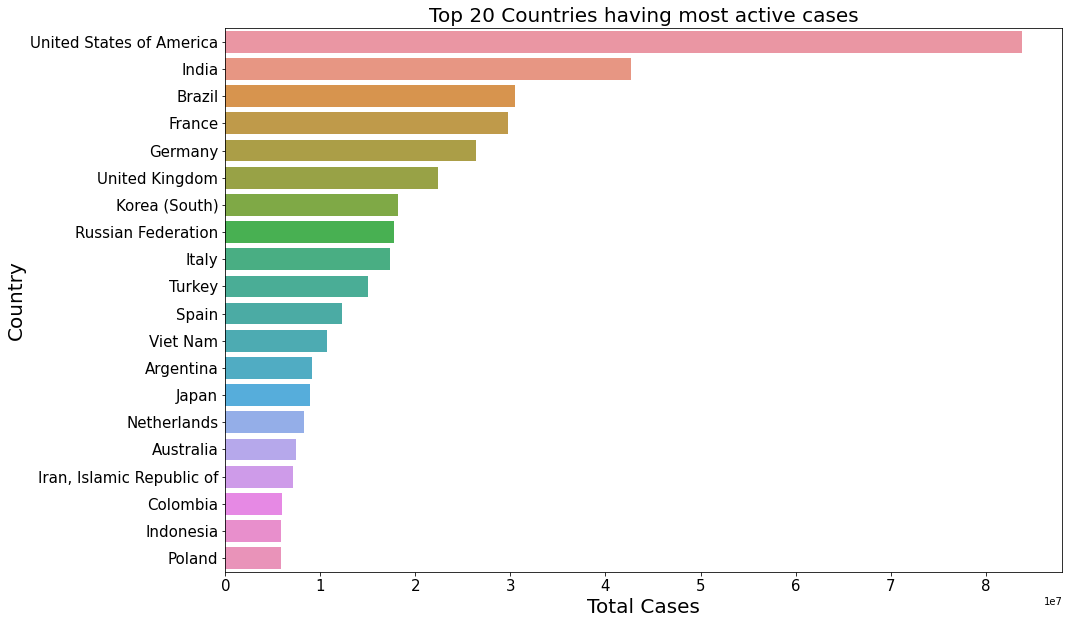

In [45]:
#PLOTTING top 20 impacted countries by COVID-19 in terms of infections
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 20 Countries having most active cases",fontsize=20)
ax = sns.barplot(x=top_active['Active cases'],y=top_active.head(20).Country)
ax.set(xlabel="Total Cases",ylabel="Country")

[Text(0.5, 0, 'Total Deaths'), Text(0, 0.5, 'Country')]

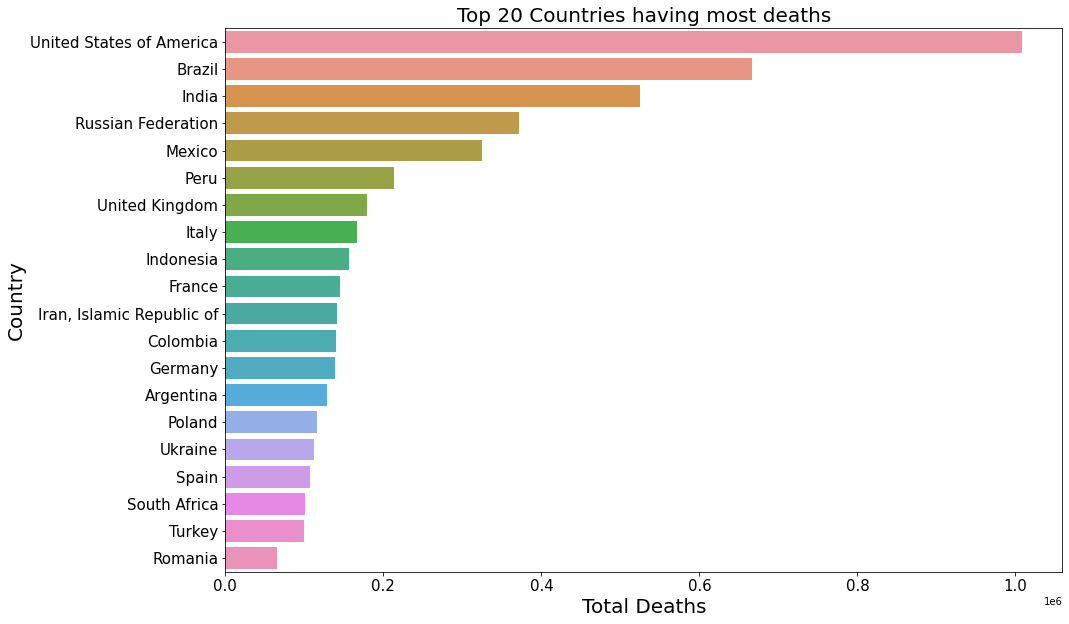

In [46]:
#PLOTTING top 20 impacted countries by COVID-19 in terms of deaths
top_deaths = top.sort_values('Deaths', ascending=False).reset_index()
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Deaths",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 20 Countries having most deaths",fontsize=20)
ax = sns.barplot(x=top_deaths['Deaths'],y=top_deaths.head(20).Country)
ax.set(xlabel="Total Deaths",ylabel="Country")

So the first step in our investigation of the possible correlation between the exposure to air pollution and the fast spread and high mortality rate of covid 19 in some countries compared to other countries, will be the comparison between the levels of air pollution in the most infected cities of the world.

In [68]:
# Define a function plotting air pollutant changes in different cities using the rolling windows

end_date = final_clean_air_pollution_df['Date'].max()
def specie_cities(df, city_list, specie):

    specie_cities_df = df[(df["City"].isin(city_list)) & (
        df["Specie"] == specie)].sort_values("Date").copy()
    specie_cities_transposed_df = specie_cities_df.pivot_table(
        index="Date", columns="City", values="median")
    rolling_specie_cities = specie_cities_transposed_df[city_list].rolling(
        7, center=True).mean()

    plt.style.use('seaborn-bright')
    rolling_specie_cities.plot(figsize=(12, 5))

    plt.xlabel("Year_Month", fontsize=12)
    plt.xlim(starting_date, end_date)
    plt.axvspan("2020-03", "2020-07", color='red', alpha=0.1)
    plt.axvspan("2019-03", "2019-07", color='dodgerblue', alpha=0.1)

    plt.ylabel(specie, fontsize=12)
    plt.title(
        f"7 day Moving Average of median {specie} in {city_list} in 2019-2020H1", fontsize=14)
    plt.savefig(f"images/{city_list}_{specie}.png")

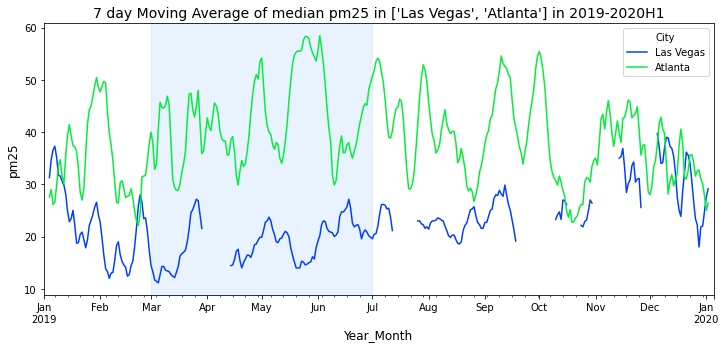

In [69]:
specie_cities(df=final_clean_air_pollution_df, city_list=["Las Vegas", "Atlanta"], specie="pm25")

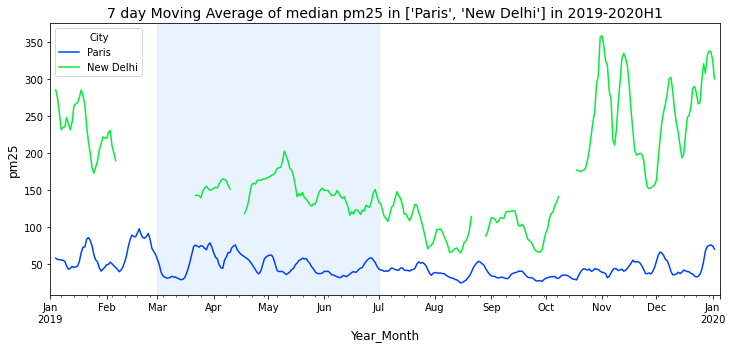

In [70]:
specie_cities(df=final_clean_air_pollution_df, city_list=['Paris', 'New Delhi'], specie="pm25")

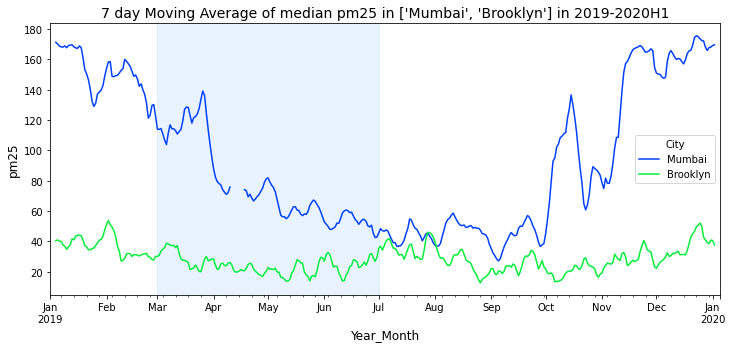

In [72]:
specie_cities(df=final_clean_air_pollution_df, city_list=['Mumbai', 'Brooklyn'], specie="pm25")

Even though these cities have very different air pollution levels, they still rank as the most infected cities in the world.

To make sure that air pollution does not really have a significant effect on covid 19 devastations, we moved on to study the correlation between major air pollutants and covid 19 cases.

![Correlation between major air pollutants and covid-19 cases](images/correlation.png)

We found out that there is a significant correlation between particular matters PM2.5 and PM10 but **there is no significant correlation between covid 19 cases and air pollution.**

**Then what explains the fact that some countries were way more infected than others ?**

* **Lifestyle & Food**
In the United States, the most infected country in terms of deaths and confirmed case, it has been estimated that poor diet quality and physical inactivity contributed to approximately 16.6 percent of its deaths in 2000, compared to 14 percent in 1990.

The Aghori in India are a small group of ascetic Shaiva sadhus. They live on eating human flesh. They get the flesh from corpses floating down the river, which family members push into the Ganges River if they don't have enough money for cremation.
They also smear human ashes all over their bodies and occasionally  consume their own excrement.

A large body of research shows that a poor diet can impair immune function and weaken the immune response.

***So can a weak immune system be the reason for this fast and widespread in some countries particularly the United States ?***

***Does an unhealthy lifestyle lead to a wider spread of the virus ?***

* **Poverty**
 In Bangladesh, 20.5% of the population lived below the national poverty line in 2019. A country that has a high rate of covid 19 cases.
Poverty can mean that people will not be able to keep a social distance : they cannot afford private transport, they live in unorganized and overpopulated cities, their work mostly consists of interactions with people (sellers, manual labor jobs, …) and probably they don’t have enough savings to leave their job and respect the lockdown measurements.

***So can poverty actually affect the spread of COVID-19 ?***

* **Environmental factors**
Sewage and human excreta have long been recognized as potential routes for transmitting human pathogens.
Covid 19 virus has been detected in human feces and urine, where it could remain viable for days and show infectivity.
Urban flooding, a common threat in summer caused by heavy rainfalls, is frequently reported in urban communities along with sewage overflows.

***So can Urban flooding be a factor of the fast spread of COVID-19 ?***

In addition, evidence suggests that transmission of the virus is primarily through respiratory droplets and contact routes. So can storms, which are characterized by **strong wind**, help transmit the virus in the air ?

**These questions need profound studies to investigate their correctness.**

## Lockdown Effect on Air Quality

The studied pollutants are **NO2**, **PM2.5**, **PM10** , **O3**, **CO**, **PSI** and **SO2**, where Particulate matter (PM), Nitrogen oxides (NOx),Carbon monoxide (CO) and Sulfur dioxide (SO2)  are the main ones generated by industry and vehicles, with a **stronger emphasis on NO2 as it is one of the main markers related to vehicle traffic.** 

The studied cities are again the ones that are the top-ranked infected cities worldwide.

So, we studied the evolution of pollutants concentration in the air before the arrival of the new coronavirus and after that in these cities **starting in January 2019 and ending our study in April 2021.**

On 30 January 2020, WHO declared the rapidly spreading COVID-19 outbreak a **Public Health Emergency of International Concern**. **By April 2020, about half of the world's population was under some form of lockdown**, with more than 3.9 billion people in more than 90 countries or territories having been asked or ordered to stay at home by their governments.

**The lockdown ended in 2021 in most countries.**

In [99]:
def get_specie_data(country_df, specie_name):
    return country_df[country_df['Specie']==specie_name].sort_values(by='Date')
    
def plot_2D(city_name):
    air_df = air_pollution_df[(air_pollution_df["Date"] >= "2019-01-01") & (air_pollution_df["Date"] <= "2021-05-01")].copy()
     
    city_air_quality_df = air_df[(air_df['City']==city_name)]
     
    pm25 = get_specie_data(city_air_quality_df, 'pm25')
    no2 = get_specie_data(city_air_quality_df, 'no2')
    o3 = get_specie_data(city_air_quality_df, 'o3')
    so2 = get_specie_data(city_air_quality_df, 'so2')
    pm10 = get_specie_data(city_air_quality_df, 'pm10')
    co = get_specie_data(city_air_quality_df, 'co')
    psi = get_specie_data(city_air_quality_df, 'psi')
    
    
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(pm25['Date'],pm25['median'],color='blue', label='PM2.5')
    plt.plot(no2['Date'],no2['median'],color='red', label='NO2')    
    plt.plot(o3['Date'],o3['median'],color='green', label='O3')
    plt.plot(so2['Date'],so2['median'],color='yellow', label='SO2')
    plt.plot(pm10['Date'],pm10['median'],color='black', label='PM10')
    plt.plot(co['Date'],co['median'],color='purple', label='CO')
    plt.plot(psi['Date'],psi['median'],color='orange', label='PSI')
    
    plt.ylabel('Air pollutants level', fontsize=16)
    plt.title(f'{city_name} Air Pollutants')
    plt.legend()

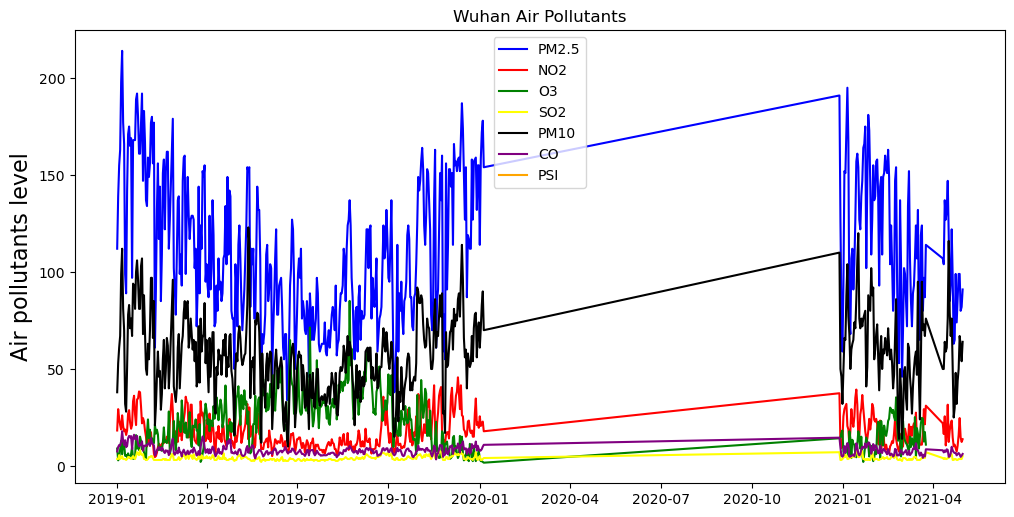

In [100]:
plot_2D('Wuhan')

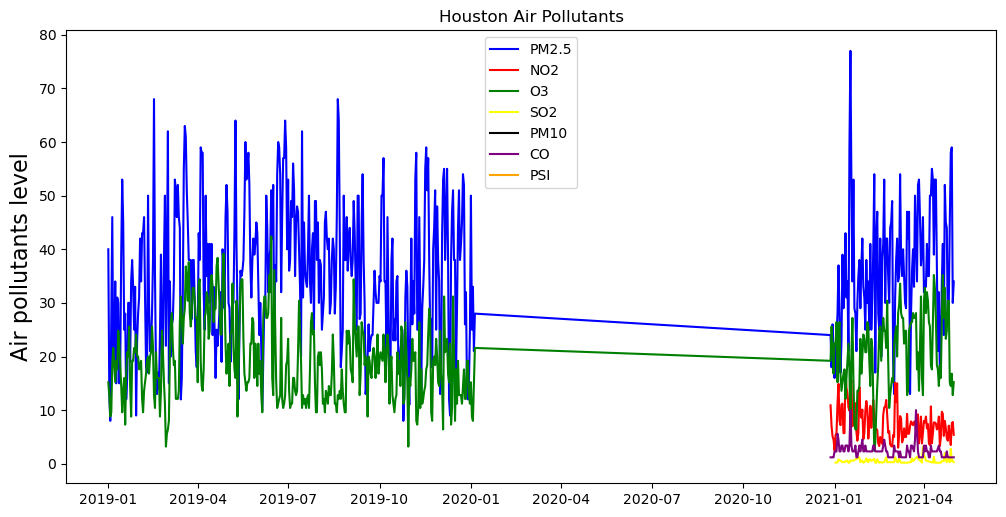

In [101]:
plot_2D('Houston')

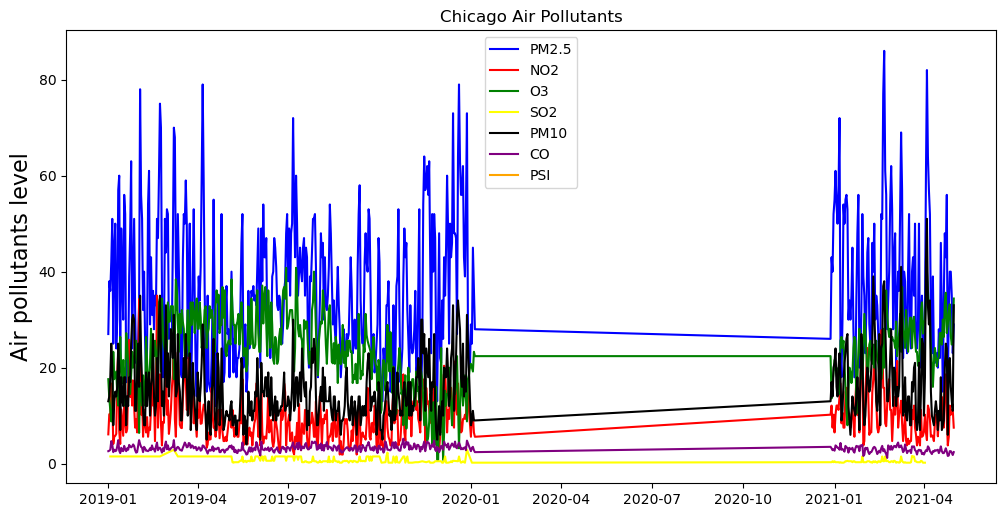

In [103]:
plot_2D('Chicago')

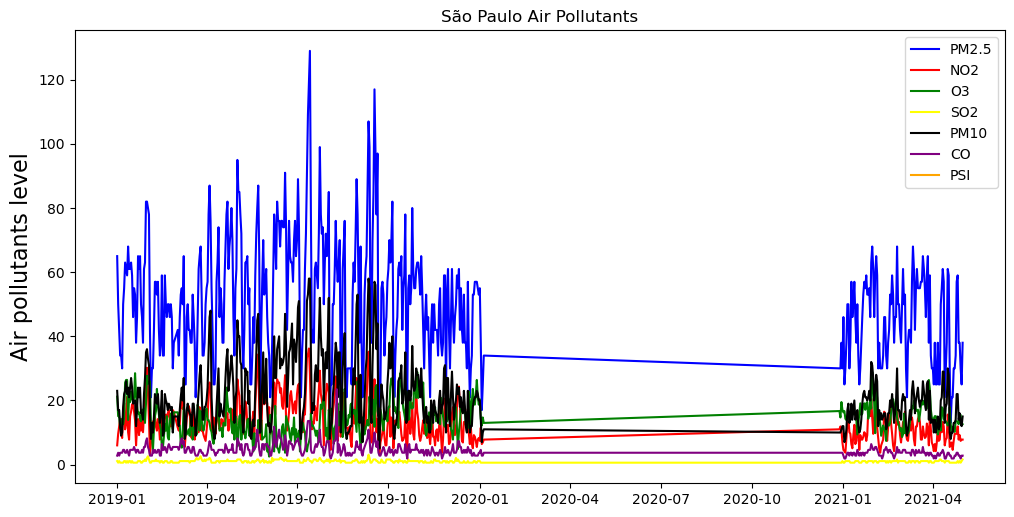

In [104]:
plot_2D('São Paulo')

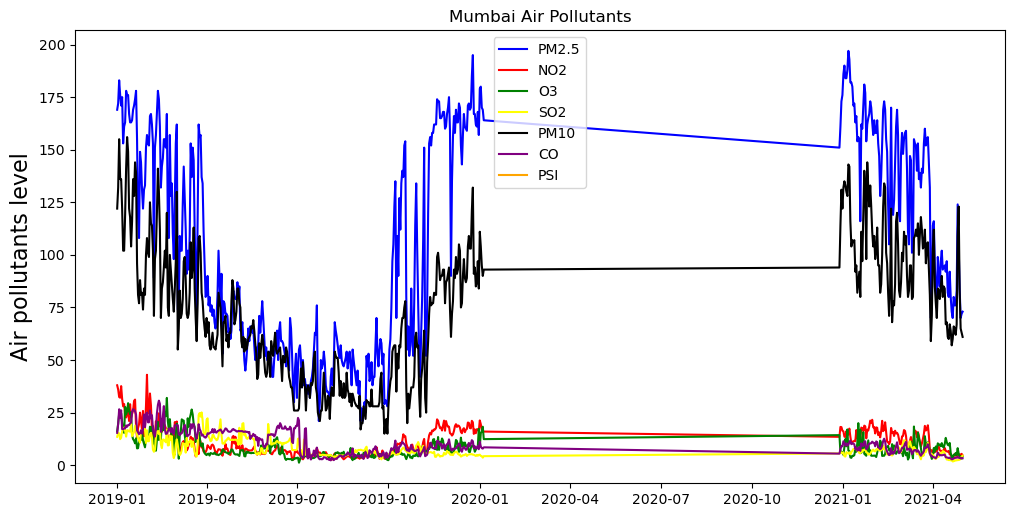

In [105]:
plot_2D('Mumbai')

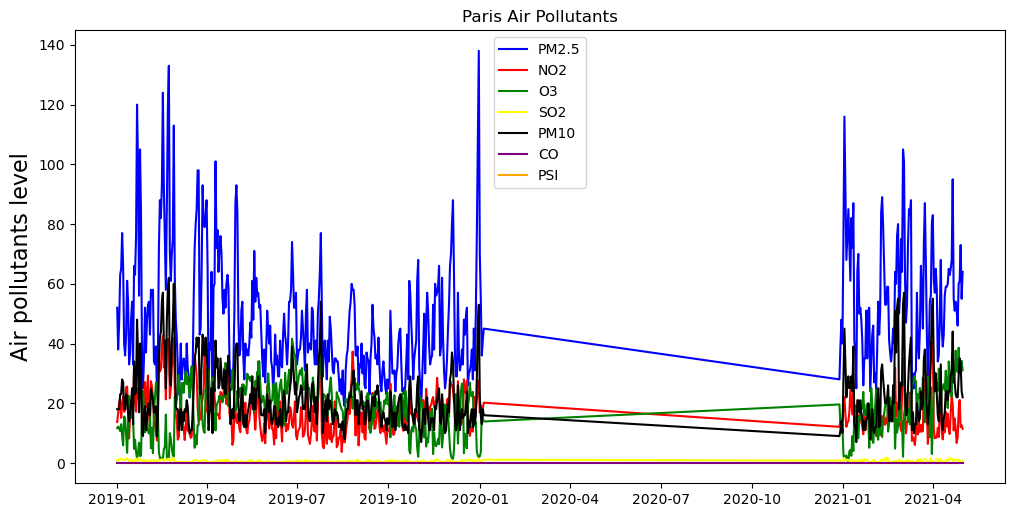

In [106]:
plot_2D('Paris')

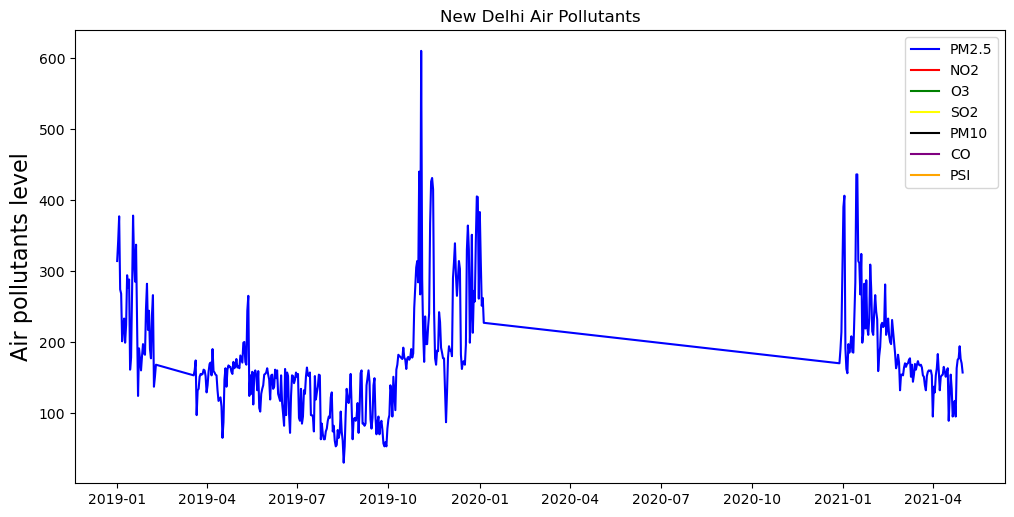

In [107]:
plot_2D('New Delhi')

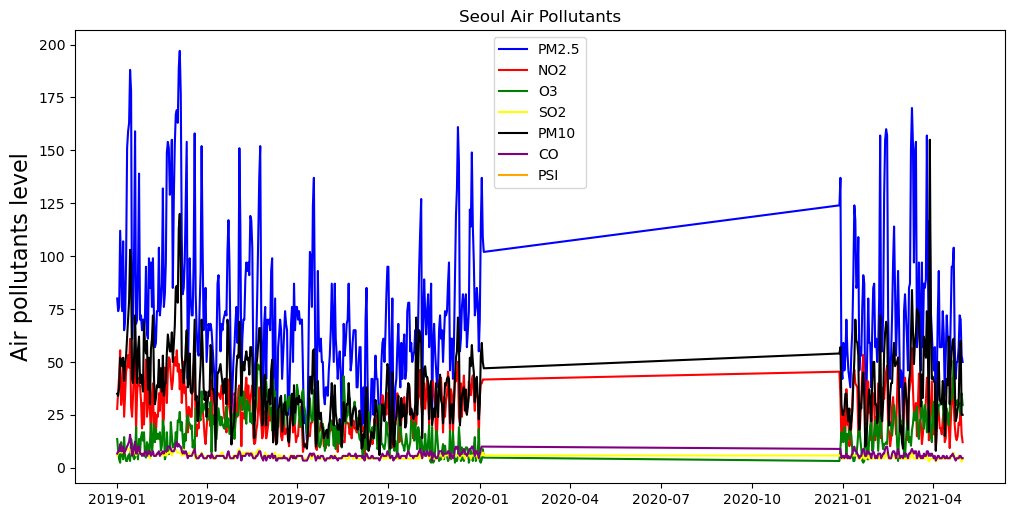

In [108]:
plot_2D('Seoul')

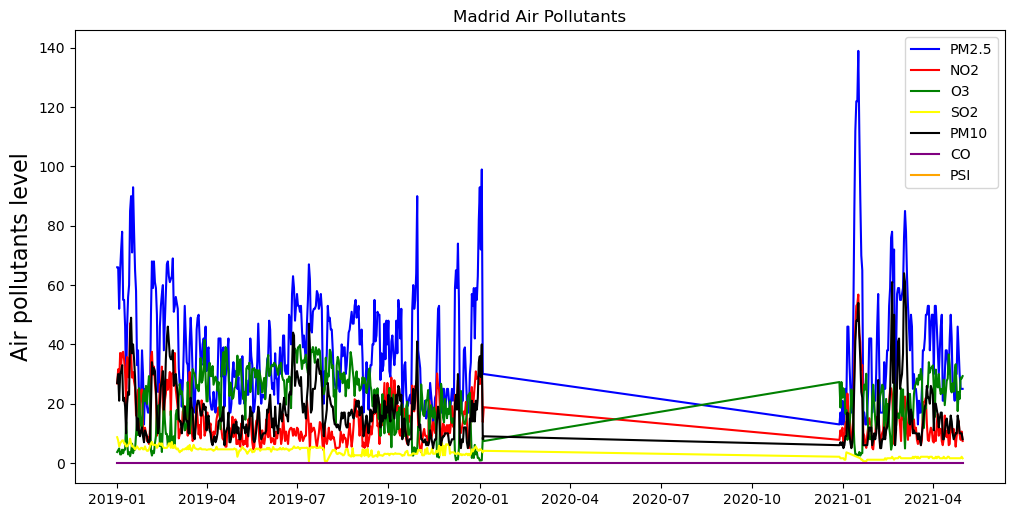

In [109]:
plot_2D('Madrid')

As we can see, air pollutants have decreased significantly during the period of lockdown. 


We can also notice a peak that precedes the beginning of the lockdown. One hypothesis is that people chose to **use private transport instead of public for safety reasons** (the risk of contagion increases in crowded places such as the subway or the bus), resulting in an increase in emissions from road traffic.
However, an alternative hypothesis to explain these peaks is through what we could call the **'last minute' effect**. : as soon as the authorities announced measures that would result in a further limitation of freedom of movement, people rushed to the car to cover last necessities (shopping, moving houses,  leaving the city ) before it was too late.


We notice a peak at the end of the lockdown which can be explained by the return to activity which has meant a **return to the private vehicle to the detriment of public transport, perceived as potentially dangerous.**

Although there seems to be a clear relationship between the measures against the coronavirus and the drops in emissions, it should be mentioned that **meteorological factors have also been able to contribute to a greater reduction in pollution levels.** The beginning of the month of March 2020 was marked by the **'Karine' storm in Madrid**, which left strong winds and widespread rains, while atmospheric instability has been the tonic during the second half of the month.

However, **in March of the 2013-2018 period there was more abundant rainfall than in the same month of 2020, without the decrease in pollution approaching that observed this year.**

### Satellite Observations in Italy
To further consolidate our results, we observed the **evolution of NO2 emissions in Italy**. **Italy is one of the european countries that have been significantly affected by the COVID-19 pandemic**. As of June 2020, there have been more than 230k confirmed cases, and about 33k deaths attributed to the coronavirus.

**March 2020 will be the focus of our analysis, as the majority of government measures were imposed during that month in Italy**. The pollution levels of March 2019 will be used as a baseline, for comparison purposes.

In [ ]:
# Download necessary files (NO2, CO, SO2 and O3 in Italy, Greece and China)

from sentinelsat import SentinelAPI, geojson_to_wkt, read_geojson

user = 's5pguest' 
password = 's5pguest' 

#GeoJSON coordinates file that has a rectangular shape,and covers the geographic region of Italy and Greece.
italy_greece_area = r'map_italy_greece.geojson'

#Accessing the Sentinel-5P API to download the NO2, CO, SO2 and O3  products for areas specified in GeoJSON files
api = SentinelAPI(user, password, 'https://s5phub.copernicus.eu/dhus')
footprint = geojson_to_wkt(read_geojson(italy_greece_area))

#Creating two sets of products for March 2019 and March 2020,
#So we can compare the levels of air pollutants in our analysis
no2_products_2019 = api.query(footprint, date = ('20190301', '20190401'),
                     producttype = 'L2__NO2___' )

no2_products_2020 = api.query(footprint, date = ('20200301', '20200401'),
                     producttype = 'L2__NO2___' )


co_products_2019 = api.query(footprint, date = ('20190301', '20190401'),
                     producttype = 'L2__cO___' )

co_products_2020 = api.query(footprint, date = ('20200301', '20200401'),
                     producttype = 'L2__CO___' )


so2_products_2019 = api.query(footprint, date = ('20190301', '20190401'),
                     producttype = 'L2__SO2___' )

so2_products_2020 = api.query(footprint, date = ('20200301', '20200401'),
                     producttype = 'L2__SO2___' )


o3_products_2019 = api.query(footprint, date = ('20190301', '20190401'),
                     producttype = 'L2__O3___' )

o3_products_2020 = api.query(footprint, date = ('20200301', '20200401'),
                     producttype = 'L2__O3___' )

#Downloading all the products in the L2 folder
api.download_all(no2_products_2019, directory_path='data/L2')
api.download_all(no2_products_2020, directory_path='data/L2')

api.download_all(co_products_2019, directory_path='data/L2')
api.download_all(co_products_2020, directory_path='data/L2')

api.download_all(so2_products_2019, directory_path='data/L2')
api.download_all(so2_products_2020, directory_path='data/L2')

api.download_all(o3_products_2019, directory_path='data/L2')
api.download_all(o3_products_2020, directory_path='data/L2')

In [ ]:
# Process downloaded files
import harp
from glob import iglob
from os.path import join
from joblib import Parallel, delayed

#Creating a function that processes the L2 products downloaded from the API
#The HARP tool will be used for the conversion
def process_file(file):
    operations=" \
    tropospheric_NO2_column_number_density_validity>50; \
    derive(tropospheric_NO2_column_number_density [Pmolec/cm2]); \
    derive(datetime_stop {time}); \
    latitude > 34.4 [degree_north] ; latitude < 47.7 [degree_north] ; \
    longitude > 5.8 [degree_east] ; longitude < 28.9 [degree_east] ; \
    bin_spatial(1330, 34.4, 0.01, 2310, 5.8, 0.01); \
    derive(latitude {latitude}); derive(longitude {longitude});\
    keep(NO2_column_number_density, tropospheric_NO2_column_number_density,\
    stratospheric_NO2_column_number_density, NO2_slant_column_number_density,\
    tropopause_pressure,absorbing_aerosol_index,cloud_fraction, datetime_start, longitude, latitude)"
    
    
    try:
        harp_L2_L3 = harp.import_product(file, operations = operations)
        export_folder = "{export_path}\{name}".format(export_path='data\L3',
                        name = file.split('\\')[-1].replace('L2', 'L3'))
        harp.export_product(harp_L2_L3, export_folder, file_format='netcdf')
     
    #Some files may not be suitable for processing due to low quality data
    #or other reasons, so we must handle the associated exception  
    except Exception as e:
        print(e)


input_files = sorted(list(iglob(join('data\L2', '*'), recursive=True)))

#The Parallel class utilizes multiple CPU cores during the processing,
#and completes the task signficantly faster
Parallel(n_jobs=8, verbose=10)(delayed(process_file)(file) for file in input_files)

In [ ]:
# Generate graphs
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from glob import iglob
from os.path import join
import pandas as pd
import geopandas as gpd


def generate_graph(coordinates, country, region=None):
    
    if region == None: region = country
    
    files_L2 = sorted(list(iglob(join('data\L2', '*'), recursive=True)))
    files_L3 = sorted(list(iglob(join('data\L3', '*'), recursive=True)))
    
    attributes = {
            i.split('\\')[-1]: {
                'time_coverage_start': xr.open_dataset(i).attrs['time_coverage_start'],
                'time_coverage_end': xr.open_dataset(i).attrs['time_coverage_end'],
            } for i in files_L2
        }
    
    def preprocess(ds):
        ds['time'] = pd.to_datetime(np.array([attributes[ds.attrs['source_product']]['time_coverage_start']])).values
        return ds
    
    L3_MCH_19_20 = xr.open_mfdataset(files_L3, combine='nested', concat_dim='time', preprocess=preprocess, chunks={'time': 100})
    
    L3_MCH_19 = L3_MCH_19_20.sel(time=slice('2019-03-01', '2019-03-31'))
    L3_MCH_19 = L3_MCH_19.resample(time='1D').mean(dim='time', skipna=None)
    
    L3_MCH_20 = L3_MCH_19_20.sel(time=slice('2020-03-01', '2020-03-31'))
    L3_MCH_20 = L3_MCH_20.resample(time='1D').mean(dim='time', skipna=None)
    
    L3_MCH_19_mean = L3_MCH_19.mean(dim='time')
    no2_MCH_19_mean = L3_MCH_19_mean['tropospheric_NO2_column_number_density']
    
    L3_MCH_20_mean = L3_MCH_20.mean(dim='time')
    no2_MCH_20_mean = L3_MCH_20_mean['tropospheric_NO2_column_number_density']
    
    
    # Creating the main figure and the two subplots
    fig = plt.figure(figsize=(20, 10))
    plt.subplots_adjust(wspace=0)
    
    
    ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
    ax1.set_extent(coordinates)
    
    ax2 = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
    ax2.set_extent(coordinates)
    
    # Adding the map of specified country
    shp_country = shapereader.natural_earth(resolution='10m', 
                                        category='cultural', 
                                        name='admin_1_states_provinces')
    df = gpd.read_file(shp_country)
    poly = df.loc[df['admin'] == country]['geometry']
    
    ax1.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)
    ax2.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)
    
    # Add NO2 data
    im1 = no2_MCH_19_mean.plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=15, x='longitude', y='latitude', zorder=3)
    im1.colorbar.remove()
    
    im2 = no2_MCH_20_mean.plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=15, x='longitude', y='latitude', zorder=3)
    im2.colorbar.remove()
    
    
    # set plot frame 
    gl1 = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle=':')
    gl1.xlabels_top = False
    gl1.ylabels_right = False
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    gl2 = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle=':')
    gl2.xlabels_top = False
    gl2.ylabels_right = False
    gl2.xformatter = LONGITUDE_FORMATTER
    gl2.yformatter = LATITUDE_FORMATTER
    
    # set colorbar properties
    cbar_ax = fig.add_axes([0.13, 0.13, 0.15, 0.01])
    cbar = plt.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[0,1,5,10,15])
    cbar.set_label(r"$10^{15}$ molecules / cm$_2$)", labelpad=-50, fontsize=13)
    cbar.outline.set_visible(False)
    cbar.ax.set_yticklabels(['0','1', '5', '10', '15'])
    
    # Add text
    fig.text(0, 1.1, 'Average NO2 concentration', fontsize = 17, transform=ax1.transAxes)
    ax1.text(0, 1.02, region + ', March 2019', fontsize = 13, transform=ax1.transAxes)
    ax2.text(0, 1.02, region + ', March 2020', fontsize = 13, transform=ax2.transAxes)
    
    plt.savefig('images\pollution_' + region + '.png', bbox_inches='tight', dpi=150);
    
    
coords_italy = [6.3, 19.1, 36.3, 47.5]
coords_lombardy = [8.4, 11.5, 44.6, 46.6]
coords_greece = [19.3, 28.9, 34.7, 41.8]
coords_attica = [22.8, 24.1, 37.6, 38.4]


generate_graph(coords_italy, 'Italy')
generate_graph(coords_lombardy, 'Italy', 'Lombardy')
generate_graph(coords_greece, 'Greece')
generate_graph(coords_attica, 'Greece', 'Attica')


![Italy Pollution](images/pollution_Italy.png)

As we can see, nitrogen dioxide concentration was significantly decreased in Italy during March 2020, compared to the same period last year. This can be at least partly attributed to the COVID-19 measures implemented by the italian government, and the subsequent reduction of traffic and industrial activity.

## Air Pollution in Lombardy
The Lombardy region of Italy was severely affected by the COVID-19 pandemic, having one of the highest rates of confirmed cases and deaths in the country. Lombardy and its capital city Milan are among the most polluted areas of Europe, due to the presence of various factories and other industrial facilities. Furthermore, the geographic characteristics of the region further exacerbate the phenomenon, by causing low wind speeds. Researchers have suggested that air pollution has contributed to the high COVID-19 mortality rate that was recorded in the region.

![Lombardy Pollution](images/pollution_Lombardy.png)

As we can see Lombardy was a pollution hotspot in March 2019. The government measures for the COVID-19 pandemic decreased NO<sub>2</sub> concentration significantly.

Conclusion : 
* Air pollution doesn't have a significant effect on COVID-19
* Lockdown helped decreasing air pollution